## TEAM NAMES: Mieszko Mirgos, Paweł Gelar, Jakub Kasprzak

## Introduction to NLP (Natural Language Processing)
<br>
© mgr inż. Soveatin Kuntur / Winter School - Data Literacy
<br>
Warsaw, 06.02 - 10.02.2023

© Anna Wróblewska, improvements and adding more metrics, and classifiers


As we know from lecture, general pipeline of NLP is as follows:
<br>
1. Data Preprocessing
<br>
2. Data Processing
<br>
3. Output

## Data Processing

Now we come to second part of our experiment which is data processing. This task will be classification problem. Which means, we will ask our model to classify the sentiment. It is worth to mention that, you can use your clean dataset to do this part. <br>

As for example reason, teacher will show how to use sklearn packages on this part.

## Dataset Description
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

You can download the dataset in your workspace (or in your local computer) by doing
<br>
nltk.download('twitter_samples')


In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords
import matplotlib.pyplot as plt            # library for visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [2]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

To make it easier, let us used pandas dataframe

In [4]:
# Create a dataframe from positive tweets
pos_tweet = pd.DataFrame(all_positive_tweets, columns=['Tweet'])
# Add a column to dataframe for positive sentiment value 1
pos_tweet['Sentiment'] = 1
# Create a temporary dataframe for negative tweets
neg_tweet = pd.DataFrame(all_negative_tweets, columns=['Tweet'])
# Add a column to temporary dataframe for negative sentiment value 0
neg_tweet['Sentiment'] = 0
# Combe positive and negative tweets in one single dataframe
#df = pos_tweet.append(neg_tweet, ignore_index=True)
df = pd.concat([neg_tweet, pos_tweet], ignore_index=True)

df = df.sample(frac = 1)
df.reset_index(drop=True, inplace=True)

In [5]:
df

,Tweet,Sentiment
0,Bowling is always best with friends :) http://...,1
1,last chance :(,0
2,i miss netball :((,0
3,"So dear fandoms and shippers, lets set aside o...",1
4,@realyys_ OTL NEVERMIND :( at least i got jeon so,0
...,...,...
9995,Lovely chat about cycling in Oxford with a @su...,1
9996,@MikeJack1976 Thankyou very much. We are happy...,1
9997,@buzylizzy1 @tlntweets @NutzAudio @LiPSMACKER_...,1
9998,@paradisecreated yup! Should be really cool :),1


Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [6]:
# Displaying shape of dataset
print('Dataset size:',df.shape)
df.groupby('Sentiment').count()

Dataset size: (10000, 2)


,Tweet
Sentiment,
0,5000
1,5000


In [7]:
# Splitting the dataset into train and test set
train, test = train_test_split(df,test_size = 0.1)
train

,Tweet,Sentiment
7752,can my mum stop picking on my clothes please :-(,0
5465,@DIMPLEDJAI taylor why did you crop yourself o...,0
8061,Ohhh who will find me??? #GoodMorning #Friday ...,1
6518,when I have my own little apartment can like s...,0
9756,@Essjayleam Thanks for the refollow too! :),1
...,...,...
653,"@mRpOrTeR7 ""This Corner"" is so fucking Dope!! ...",1
468,Say #hello to @Raptech_Pumps' #LEO XST Series ...,1
198,@ogyungmaya okay but who gets to see him in th...,1
8989,What an event it was :) @KFC_India #KFCkitchen...,1


In [8]:
test

,Tweet,Sentiment
4740,@BIBBYUPDATES :(( I wish I could be there to s...,0
3495,@OzzyOsbourne @Slash I first saw GnR opening f...,0
8080,@ABNORMAL_ANA92 i'm supposed to ask where do y...,1
8356,Happy Friday Everyone! I'm here until 5pm to a...,1
4137,Why do developers release good games during sc...,0
...,...,...
3752,Snapchat me guys - sexyjane19 #snapchat #kik #...,0
4451,@Jamie_MARIEbear I've literally just recovered :(,0
5510,"＠maverickgamer_ July 24, 2015 at 07:17PM :(",0
7468,#FollowFriday @Z_Intl_Agency @Tivipro @compexl...,1


Positive words


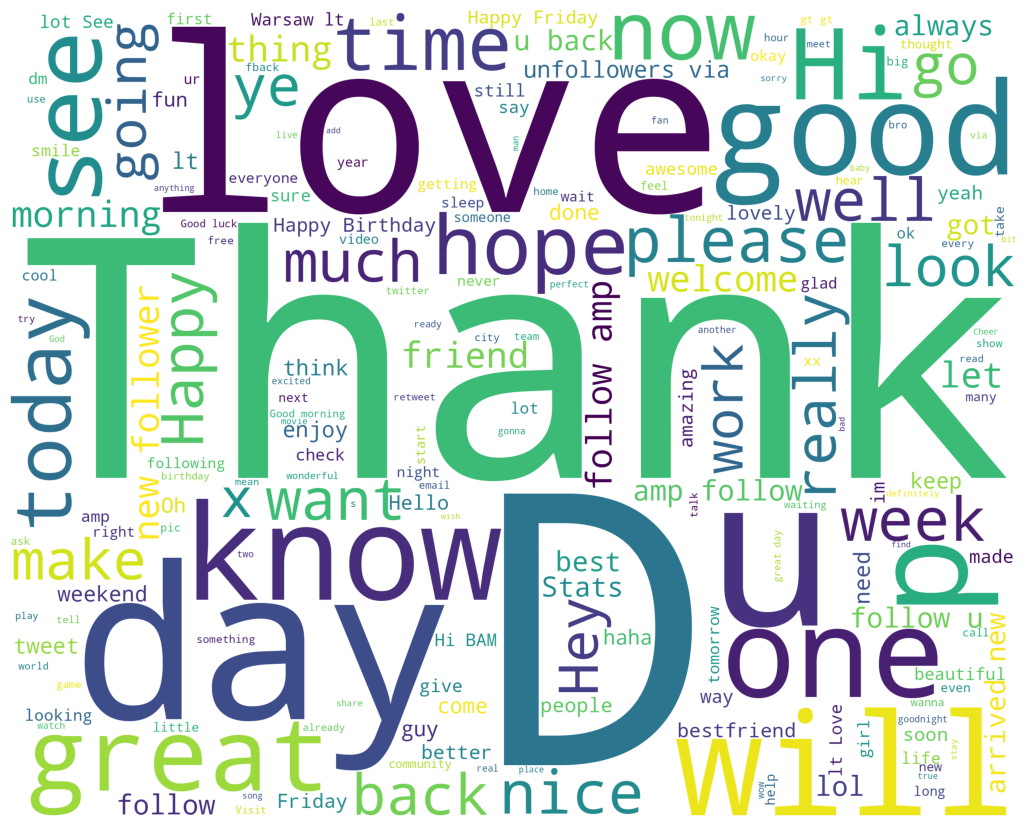

Negative words


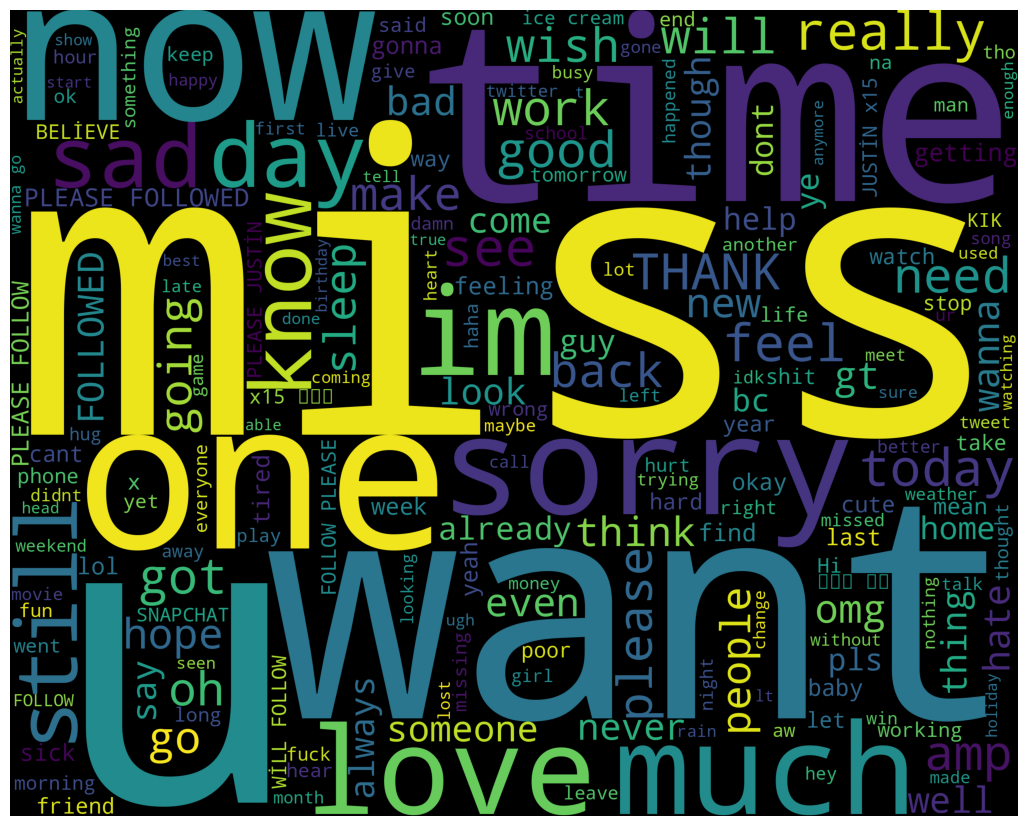

In [9]:
train_pos = train[ train['Sentiment'] == 1]
train_pos = train_pos['Tweet']
train_neg = train[ train['Sentiment'] == 0]
train_neg = train_neg['Tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.Sentiment))

test_pos = test[ test['Sentiment'] == 1]
test_pos = test_pos['Tweet']
test_neg = test[ test['Sentiment'] == 0]
test_neg = test_neg['Tweet']

In [12]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

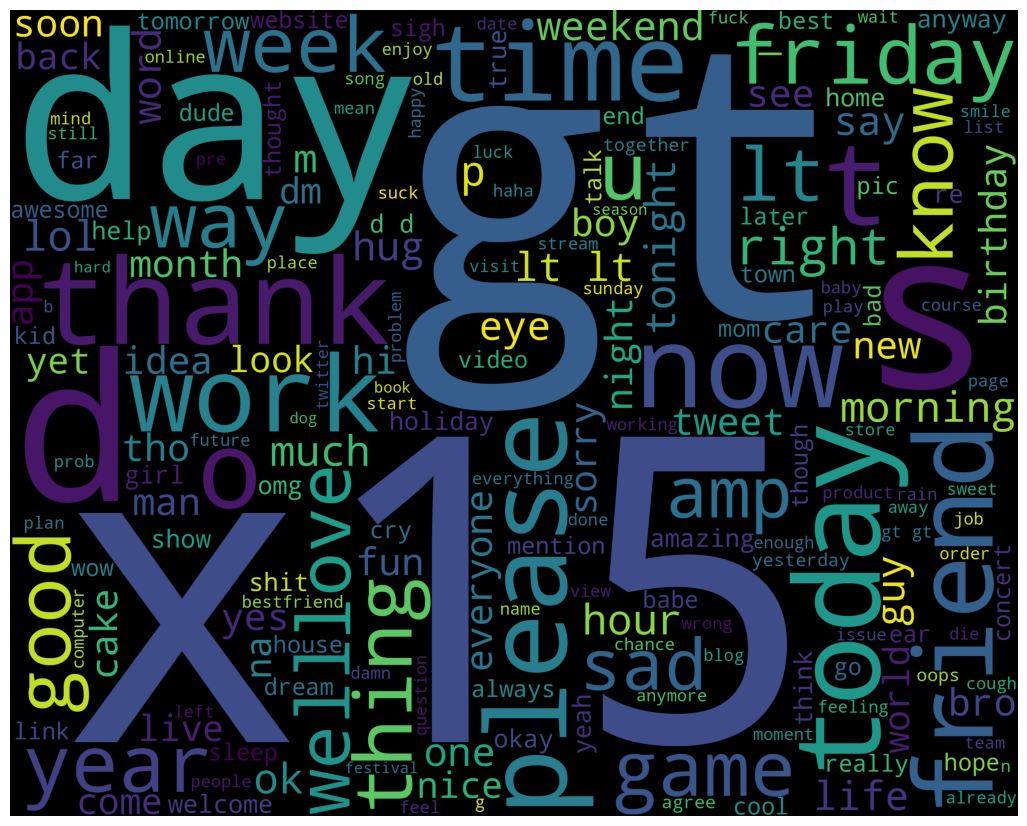

In [13]:
wordcloud_draw(w_features)

In [14]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [18]:
len(training_set)

9000

In [20]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 0):
        neg_cnt = neg_cnt + 1
for obj in test_pos:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 1):
        pos_cnt = pos_cnt + 1

print('[Negative]: %s/%s '  % (neg_cnt, len(test_neg)))
print('[Positive]: %s/%s '  % (pos_cnt, len(test_pos)))

[Negative]: 433/513 
[Positive]: 322/487 


## Useful links to start NLP
<br>
https://realpython.com/python-nltk-sentiment-analysis/

In [21]:
from sklearn.metrics import confusion_matrix

# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

for obj in test['Tweet']:
    true_labels.append(test.loc[test['Tweet'] == obj, 'Sentiment'].iloc[0])
    predicted_labels.append(classifier.classify(extract_features(obj.split())))

# Calculate and print the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[433  80]
 [165 322]]


In [ ]:
#measure F1 score, and recall, and precision
#build other model, e.g. random forest for this task

In [31]:
from sklearn.metrics import f1_score, recall_score, precision_score

# Calculate F1 score
f1_bayes = f1_score(true_labels, predicted_labels, average='weighted')  # Use 'weighted' for multi-class problems
print("F1 Score:", f1_bayes)

# Calculate recall
recall_bayes = recall_score(true_labels, predicted_labels, average='weighted')
print("Recall:", recall_bayes)

# Calculate precision
precision_bayes = precision_score(true_labels, predicted_labels, average='weighted')
print("Precision:", precision_bayes)


F1 Score: 0.752659588793525
Recall: 0.755
Precision: 0.7615377543719529


In [32]:
# prompt: add another metric for assesing the model

from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_bayes = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy_bayes)


Accuracy: 0.755


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred)
f1_logreg = f1_score(y_test, y_pred, average='weighted')
recall_logreg = recall_score(y_test, y_pred, average='weighted')
precision_logreg = precision_score(y_test, y_pred, average='weighted')
cm_logreg = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_logreg)
print("F1 Score:", f1_logreg)
print("Recall:", recall_logreg)
print("Precision:", precision_logreg)
print("Confusion Matrix:\n", cm_logreg)


Accuracy: 0.756
F1 Score: 0.7555004415897231
Recall: 0.756
Precision: 0.756759059045728
Confusion Matrix:
 [[408 105]
 [139 348]]


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
precision_rf = precision_score(y_test, y_pred, average='weighted')
cm_rf = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("Confusion Matrix:\n", cm_rf)


Accuracy: 0.595
F1 Score: 0.5559293080460396
Recall: 0.595
Precision: 0.6621599171195315
Confusion Matrix:
 [[155 358]
 [ 47 440]]


In [35]:
from sklearn.svm import SVC

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train an SVM model
model = SVC(kernel='linear')  # You can try different kernels like 'rbf', 'poly', etc.
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred, average='weighted')
recall_svm = recall_score(y_test, y_pred, average='weighted')
precision_svm = precision_score(y_test, y_pred, average='weighted')
cm_svm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_svm)
print("F1 Score:", f1_svm)
print("Recall:", recall_svm)
print("Precision:", precision_svm)
print("Confusion Matrix:\n", cm_svm)


Accuracy: 0.741
F1 Score: 0.7403406492430519
Recall: 0.741
Precision: 0.7419512810559006
Confusion Matrix:
 [[403 110]
 [149 338]]


In [36]:
# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)
# Convert to float32
X_train_vectorized = X_train_vectorized.astype(np.float32)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)
# Convert to float32
X_test_vectorized = X_test_vectorized.astype(np.float32)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train_vectorized, label=y_train)

# Define the parameters for LightGBM
params = {
    'objective': 'binary',  # or 'multiclass' if you have more than two classes
    'metric': 'binary_logloss',  # or 'multi_logloss'
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Convert probabilities to class labels (assuming binary classification)
y_pred_labels = [1 if prob >= 0.5 else 0 for prob in y_pred]

# Evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_labels)
f1_lgb = f1_score(y_test, y_pred_labels, average='weighted')
recall_lgb = recall_score(y_test, y_pred_labels, average='weighted')
precision_lgb = precision_score(y_test, y_pred_labels, average='weighted')
cm_lgb = confusion_matrix(y_test, y_pred_labels)

print("Accuracy:", accuracy_lgb)
print("F1 Score:", f1_lgb)
print("Recall:", recall_lgb)
print("Precision:", precision_lgb)
print("Confusion Matrix:\n", cm_lgb)


[LightGBM] [Info] Number of positive: 4513, number of negative: 4487
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 355
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501444 -> initscore=0.005778
[LightGBM] [Info] Start training from score 0.005778
Accuracy: 0.73
F1 Score: 0.7271427528827907
Recall: 0.73
Precision: 0.7364626489717659
Confusion Matrix:
 [[423  90]
 [180 307]]


In [26]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Apply sentiment analysis to the 'Tweet' column
train['Sentiment Scores'] = train['Tweet'].apply(get_sentiment_scores)

# Extract compound score (overall sentiment)
train['Compound Score'] = train['Sentiment Scores'].apply(lambda x: x['compound'])

# Assign sentiment labels based on compound score
train['Vader Sentiment'] = train['Compound Score'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


# Print the DataFrame with sentiment scores and labels
print(train[['Tweet', 'Sentiment Scores', 'Compound Score', 'Vader Sentiment']])

# You can now analyze the 'Vader Sentiment' column to see how the Vader library categorized the tweets.

# Example: Analyze the distribution of sentiment labels
print(train['Vader Sentiment'].value_counts())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00
                                                  Tweet  \
7752   can my mum stop picking on my clothes please :-(   
5465  @DIMPLEDJAI taylor why did you crop yourself o...   
8061  Ohhh who will find me??? #GoodMorning #Friday ...   
6518  when I have my own little apartment can like s...   
9756        @Essjayleam Thanks for the refollow too! :)   
...                                                 ...   
653   @mRpOrTeR7 "This Corner" is so fucking Dope!! ...   
468   Say #hello to @Raptech_Pumps' #LEO XST Series ...   
198   @ogyungmaya okay but who gets to see him in th...   
8989  What an event it was :) @KFC_India #KFCkitchen...   
8060  Take me back :( @ Hsm Canarios Park Hotel http...   

                                       Sentiment Scores  Compound Score  \
7752  {'neg': 0.336, 'neu': 0.5, 'pos': 0.164, 'comp...         -0.3400   
5465  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...      

In [39]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

test['Sentiment Scores'] = test['Tweet'].apply(get_sentiment_scores)

# Extract compound score (overall sentiment)
test['Compound Score'] = test['Sentiment Scores'].apply(lambda x: x['compound'])

# Assign sentiment labels based on compound score
test['Vader Sentiment'] = test['Compound Score'].apply(lambda x: 1 if x >= 0.05 else (0 if x <= -0.05 else 0))

# Create lists to store true labels and predicted labels
true_labels_vader = test['Sentiment'].tolist()
predicted_labels_vader = test['Vader Sentiment'].tolist()

# Calculate accuracy
accuracy_vader = accuracy_score(true_labels_vader, predicted_labels_vader)
print("Accuracy:", accuracy_vader)

# Calculate F1 score
f1_vader = f1_score(true_labels_vader, predicted_labels_vader, average='weighted')
print("F1 Score:", f1_vader)

# Calculate recall
recall_vader = recall_score(true_labels_vader, predicted_labels_vader, average='weighted')
print("Recall:", recall_vader)

# Calculate precision
precision_vader = precision_score(true_labels_vader, predicted_labels_vader, average='weighted')
print("Precision:", precision_vader)

# Calculate confusion matrix
cm_vader = confusion_matrix(true_labels_vader, predicted_labels_vader)
print("Confusion Matrix:\n", cm_vader)


Accuracy: 0.845
F1 Score: 0.8443897276817002
Recall: 0.845
Precision: 0.853949264753725
Confusion Matrix:
 [[397 116]
 [ 39 448]]


In [37]:
from sklearn.ensemble import ExtraTreesClassifier

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy_extratrees = accuracy_score(y_test, y_pred)
f1_extratrees = f1_score(y_test, y_pred, average='weighted')
recall_extratrees = recall_score(y_test, y_pred, average='weighted')
precision_extratrees = precision_score(y_test, y_pred, average='weighted')
cm_extratrees = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_extratrees)
print("F1 Score:", f1_extratrees)
print("Recall:", recall_extratrees)
print("Precision:", precision_extratrees)
print("Confusion Matrix:\n", cm_extratrees)


Accuracy: 0.742
F1 Score: 0.7405813660990711
Recall: 0.742
Precision: 0.7449557033248082
Confusion Matrix:
 [[415  98]
 [160 327]]


In [40]:
import pandas as pd

model_results = {
    'Model': ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'SVM', 'LightGBM', 'Extra Trees', 'Vader'],
    'Accuracy': [],
    'F1 Score': [],
    'Recall': [],
    'Precision': []
}

model_results['Accuracy'].append(accuracy_bayes)
model_results['F1 Score'].append(f1_bayes)
model_results['Recall'].append(recall_bayes)
model_results['Precision'].append(precision_bayes)

model_results['Accuracy'].append(accuracy_logreg)
model_results['F1 Score'].append(f1_logreg)
model_results['Recall'].append(recall_logreg)
model_results['Precision'].append(precision_logreg)

model_results['Accuracy'].append(accuracy_rf)
model_results['F1 Score'].append(f1_rf)
model_results['Recall'].append(recall_rf)
model_results['Precision'].append(precision_rf)

model_results['Accuracy'].append(accuracy_svm)
model_results['F1 Score'].append(f1_svm)
model_results['Recall'].append(recall_svm)
model_results['Precision'].append(precision_svm)

model_results['Accuracy'].append(accuracy_lgb)
model_results['F1 Score'].append(f1_lgb)
model_results['Recall'].append(recall_lgb)
model_results['Precision'].append(precision_lgb)


model_results['Accuracy'].append(accuracy_extratrees)
model_results['F1 Score'].append(f1_extratrees)
model_results['Recall'].append(recall_extratrees)
model_results['Precision'].append(precision_extratrees)

model_results['Accuracy'].append(accuracy_vader)
model_results['F1 Score'].append(f1_vader)
model_results['Recall'].append(recall_vader)
model_results['Precision'].append(precision_vader)


# Create a Pandas DataFrame from the results
results_df = pd.DataFrame(model_results)

# Display the table
print(results_df)


                 Model  Accuracy  F1 Score  Recall  Precision
0          Naive Bayes     0.755  0.752660   0.755   0.761538
1  Logistic Regression     0.756  0.755500   0.756   0.756759
2        Random Forest     0.595  0.555929   0.595   0.662160
3                  SVM     0.741  0.740341   0.741   0.741951
4             LightGBM     0.730  0.727143   0.730   0.736463
5          Extra Trees     0.742  0.740581   0.742   0.744956
6                Vader     0.845  0.844390   0.845   0.853949
